In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


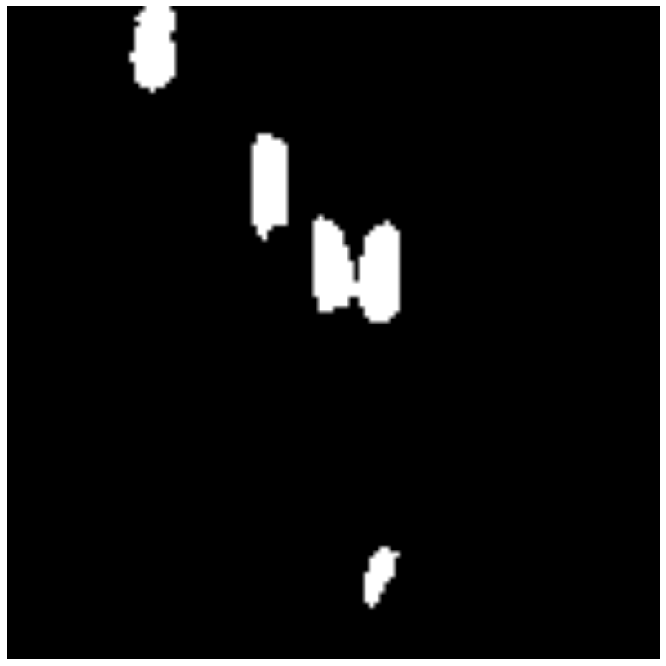

In [12]:
plt.figure(figsize = (12, 12))
plt.axis('off')
img = cv.imread('/Users/nikhilvs/repos/nyu/birds-eye-view-predictor/artifacts/data/pretrained_resnet_video_images/predicted_output/000290.png')

img = cv2.resize(img, (800, 800))

plt.imshow(img)


# x, y, w, h = cv2.boundingRect(img)
# rect1 = cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (0, 255, 0), 3)
# plt.imshow(rect1)


In [13]:
import random as rng

src = img

# src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (3,3))
# source_window = 'Source'
# cv.namedWindow(source_window)
# cv.imshow(source_window, src)
max_thresh = 255
thresh = 100 # initial threshold
# cv.createTrackbar('Canny thresh:', source_window, thresh, max_thresh, thresh_callback)
# thresh_callback(thresh)

canny_output = cv.Canny(src_gray, thresh, thresh * 2)
contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv.approxPolyDP(c, 3, True)
    boundRect[i] = cv.boundingRect(contours_poly[i])
    centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])


drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)


for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    # cv.drawContours(drawing, contours_poly, i, color)
    cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
        (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
    # cv.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)


# plt.imshow(canny_output)

In [15]:
boundRect

[(436, 711, 1, 1),
 (463, 662, 19, 49),
 (436, 662, 26, 76),
 (461, 661, 1, 1),
 (449, 388, 15, 1),
 (413, 289, 12, 26),
 (436, 286, 1, 1),
 (307, 277, 12, 11),
 (374, 266, 63, 110),
 (395, 263, 17, 26),
 (424, 262, 57, 126),
 (384, 256, 11, 6),
 (375, 256, 8, 9),
 (318, 163, 27, 121),
 (299, 155, 34, 122),
 (149, 17, 16, 83),
 (166, 0, 40, 107),
 (156, 0, 13, 16)]

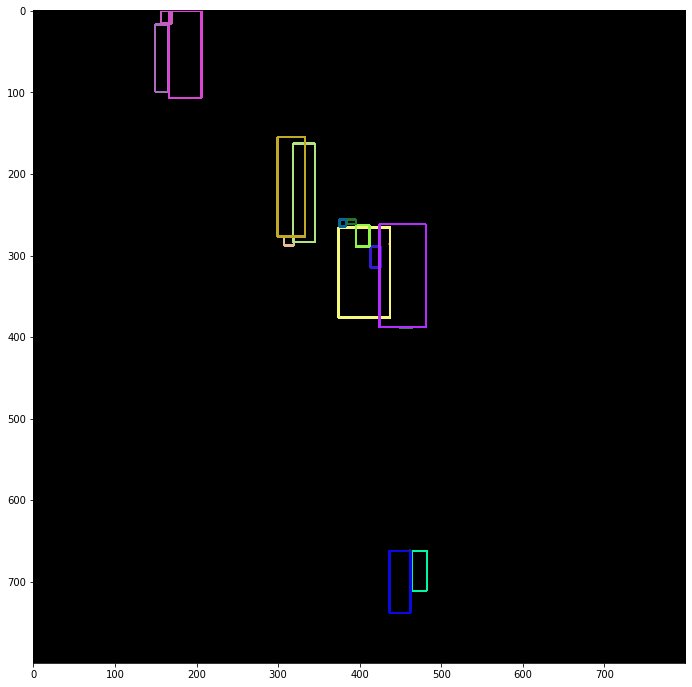

In [16]:
plt.figure(figsize = (12, 12))
# plt.axis('off')

plt.imshow(drawing)

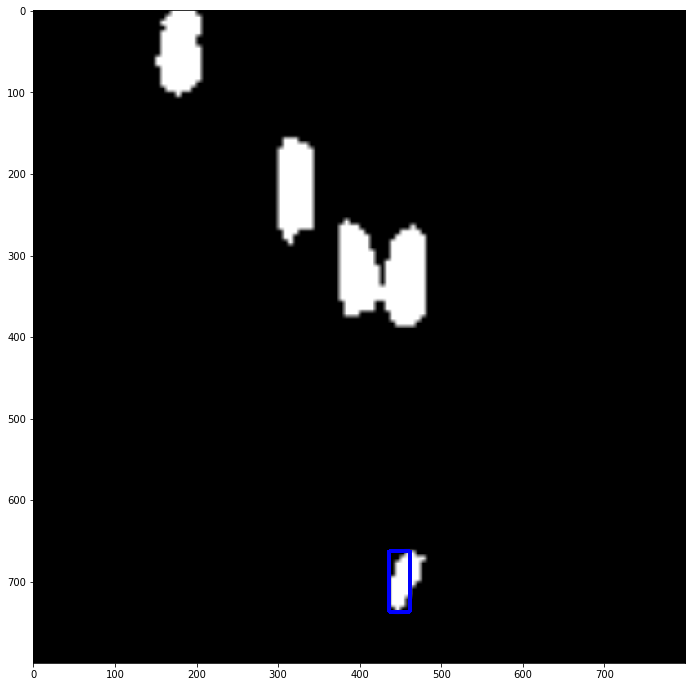

In [17]:
plt.figure(figsize = (12, 12))
# plt.axis('off')

import cv2

rect3 = cv2.minAreaRect(contours[2])
(x, y), (w, h), a = rect3 
box = cv2.boxPoints(rect3)
box = np.int0(box)
rect4 = cv2.drawContours(img.copy(), [box], 0, (0, 0, 255), 3)
plt.imshow(rect4)

In [8]:
box.shape

(4, 2)

In [21]:
import torch

x = torch.tensor([1, 2, 3, 4])
y = torch.tensor([4, 5, 6, 7])

z = torch.cat(x, y)

TypeError: cat() received an invalid combination of arguments - got (Tensor, Tensor), but expected one of:
 * (tuple of Tensors tensors, name dim, Tensor out)
 * (tuple of Tensors tensors, int dim, Tensor out)


In [23]:
y

tensor([4, 5, 6, 7])

In [34]:
contours.shape

(1, 8, 4)

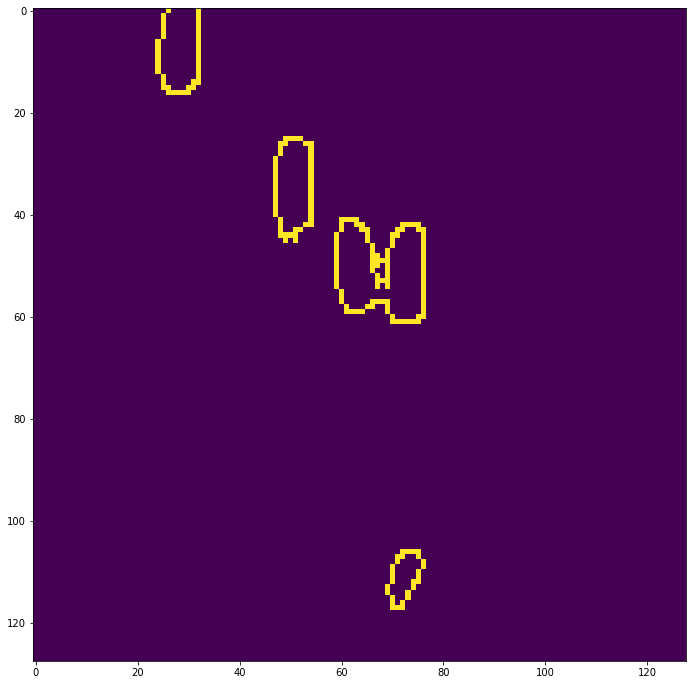

In [52]:
plt.figure(figsize = (12, 12))


plt.imshow(canny_output)